In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

In [2]:
np.random.seed(7)

### Loading data from csv file

In [6]:
df = pd.read_csv("loan_train.csv")

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
df.shape

(346, 10)

### Converting date time object

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Data visualization and preprocessing

In [11]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [12]:
import seaborn as sns

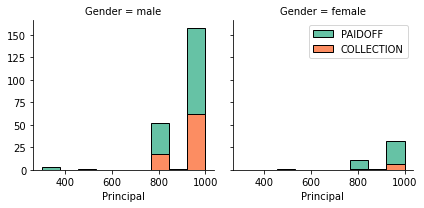

In [20]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'Principal', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

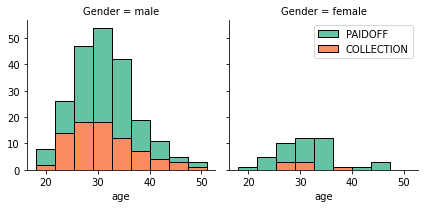

In [18]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'age', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

### Preprocessing: Feature Selection / Extraction

<h5>Day of the week people get the loan</h5>

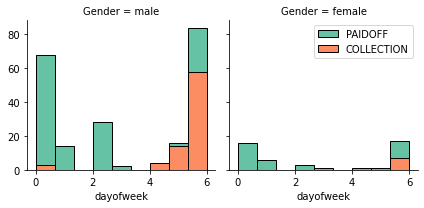

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'dayofweek', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

<h5>Months people get loan</h5>

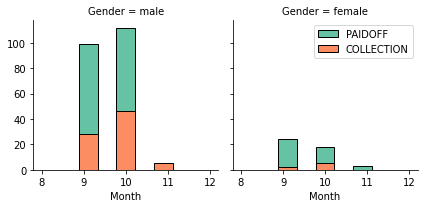

In [23]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min() - 1, df.Month.max() + 1, 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'Month', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()